# Heart Disease Prediction Using Classification Algorithms

This is a model which predicts the presence of a heart disease by using a number of features such as Sex, Age, Current Smoker, Cigs Per Day, BP Meds(which tells if the patient was using any BP medications), Prevalent Stroke, Diabetes, Tot Chol,Sys BP, Dia BP, BMI(Body Mass Index), Heart Rate and Ten Year CHD.

The dataset was downloaded from Kaggle and is a data of cardiovascular study on the residents of the town of Framingham, Massachusetts.

Here, in this dataset, our target variable or the predictant is the Ten Year CHD which will tell us based on the independant variables if that person has a risk of having a Coronary Heart Disease. Here, 0 means No and 1 means Yes.

For this dataset, we will be using three classifications algorithms; which are Logistic Regression, Random Forest Classifier and Support Vector Machines and see which yields us the best results.


In [1]:
#importing libraries for data visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#Here, we will be filling the null values in the glucose, totChol and BMI columns with the mean values
df['glucose'] = df['glucose'].fillna(df['glucose'].mean())
df['totChol'] = df['totChol'].fillna(df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4052.0,0.428677,0.494948,0.00,0.0000,0.0,1.00,1.0
age,4052.0,49.507404,8.552115,32.00,42.0000,49.0,56.00,70.0
education,4052.0,1.980257,1.019245,1.00,1.0000,2.0,3.00,4.0
currentSmoker,4052.0,0.492103,0.499999,0.00,0.0000,0.0,1.00,1.0
cigsPerDay,4052.0,9.038993,11.922504,0.00,0.0000,0.0,20.00,70.0
BPMeds,4052.0,0.029862,0.170227,0.00,0.0000,0.0,0.00,1.0
prevalentStroke,4052.0,0.005923,0.076742,0.00,0.0000,0.0,0.00,1.0
prevalentHyp,4052.0,0.309970,0.462538,0.00,0.0000,0.0,1.00,1.0
diabetes,4052.0,0.025666,0.158157,0.00,0.0000,0.0,0.00,1.0
totChol,4052.0,236.559387,43.758355,107.00,206.0000,234.0,262.00,600.0


# Data Visualization

In [11]:
#Checking the correlation
df.corr()
df.corr().style.background_gradient(cmap = 'RdYlGn')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.023465,0.014334,0.198718,0.322245,-0.052357,-0.001873,0.007097,0.017084,-0.067387,-0.032784,0.059556,0.079201,-0.116664,0.005198,0.087330
age,-0.023465,1.000000,-0.164350,-0.210928,-0.189897,0.126259,0.055223,0.307012,0.102245,0.264677,0.393367,0.211388,0.134636,-0.010098,0.115053,0.226938
education,0.014334,-0.164350,1.000000,0.018101,0.008128,-0.010829,-0.033220,-0.082837,-0.036670,-0.022499,-0.131489,-0.066899,-0.136196,-0.055622,-0.032204,-0.055297
currentSmoker,0.198718,-0.210928,0.018101,1.000000,0.770311,-0.047983,-0.030947,-0.103623,-0.038017,-0.047553,-0.128070,-0.107152,-0.164436,0.056904,-0.052289,0.019066
cigsPerDay,0.322245,-0.189897,0.008128,0.770311,1.000000,-0.046185,-0.031819,-0.067144,-0.033259,-0.025172,-0.088447,-0.053803,-0.087476,0.070081,-0.052395,0.054795
BPMeds,-0.052357,0.126259,-0.010829,-0.047983,-0.046185,1.000000,0.118731,0.261767,0.044876,0.083859,0.256784,0.195663,0.101090,0.017837,0.050859,0.091652
prevalentStroke,-0.001873,0.055223,-0.033220,-0.030947,-0.031819,0.118731,1.000000,0.073443,0.007810,-0.003560,0.058077,0.052525,0.029819,-0.013780,0.010053,0.057077
prevalentHyp,0.007097,0.307012,-0.082837,-0.103623,-0.067144,0.261767,0.073443,1.000000,0.076812,0.163495,0.695228,0.617946,0.301848,0.150363,0.084685,0.178108
diabetes,0.017084,0.102245,-0.036670,-0.038017,-0.033259,0.044876,0.007810,0.076812,1.000000,0.044855,0.108454,0.050995,0.079125,0.048337,0.606484,0.096801
totChol,-0.067387,0.264677,-0.022499,-0.047553,-0.025172,0.083859,-0.003560,0.163495,0.044855,1.000000,0.212143,0.169918,0.121925,0.087894,0.047651,0.078813


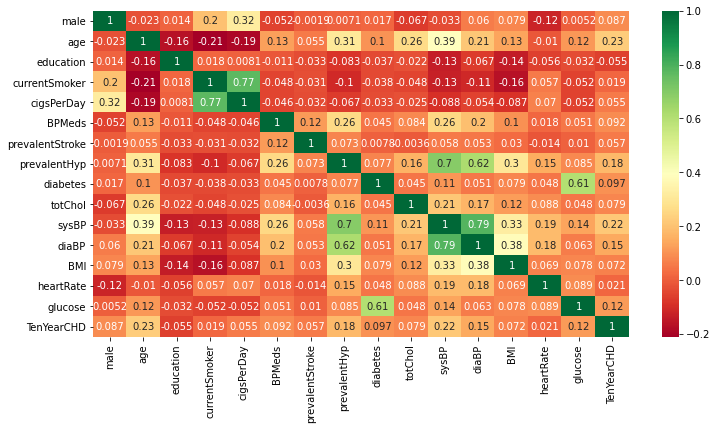

In [12]:
#Checking correlation with a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlGn')

In [13]:
#correlation with respect to the target variable
df.corr()['TenYearCHD'].sort_values()

education         -0.055297
currentSmoker      0.019066
heartRate          0.020717
cigsPerDay         0.054795
prevalentStroke    0.057077
BMI                0.071686
totChol            0.078813
male               0.087330
BPMeds             0.091652
diabetes           0.096801
glucose            0.118006
diaBP              0.148468
prevalentHyp       0.178108
sysBP              0.217992
age                0.226938
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

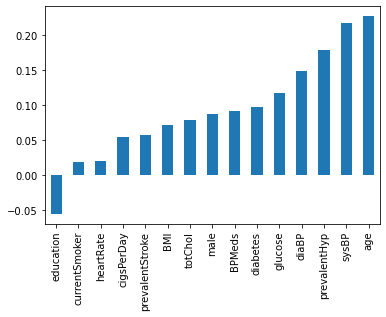

In [15]:
df.corr()['TenYearCHD'].sort_values().drop('TenYearCHD').plot(kind = 'bar')

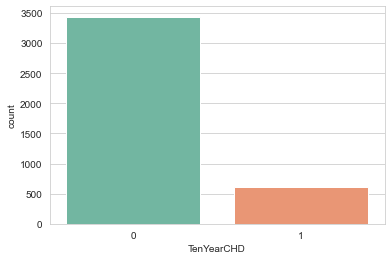

In [83]:
sns.countplot(x = 'TenYearCHD',data=df, palette = 'Set2')

In [17]:
#We can see here that the data seems to be imbalanced as there are almost 85% in 0 class and 15% in 1 class
#We will thus balance this dataset in the later stages
df['TenYearCHD'].value_counts() / len(df['TenYearCHD'])

0    0.84847
1    0.15153
Name: TenYearCHD, dtype: float64

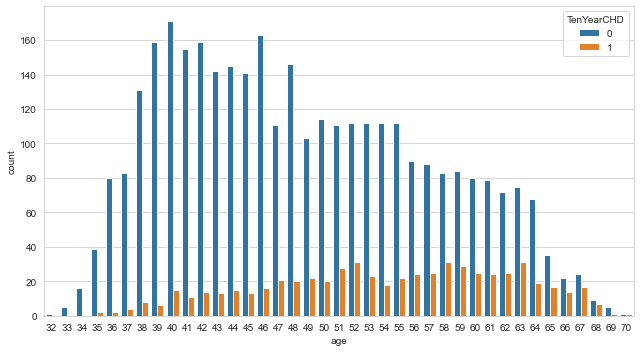

In [18]:
#Presence of the disease with respect to the age
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
sns.countplot(x='age',data=df,hue='TenYearCHD')
plt.tight_layout()

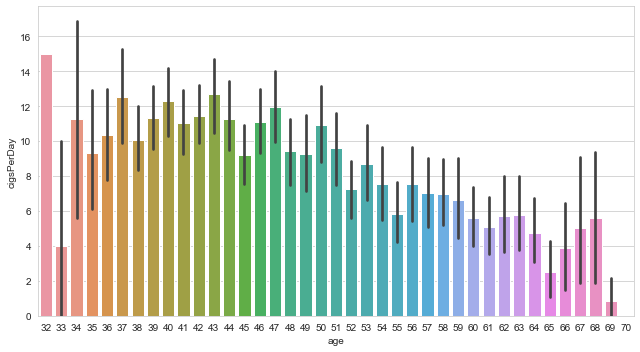

In [19]:
plt.figure(figsize=(9,5))
sns.barplot(x='age',y='cigsPerDay',data=df)
plt.tight_layout()

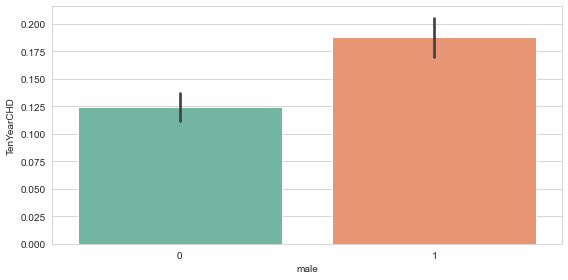

In [20]:
#Here 0 is Female and 1 is Male
plt.figure(figsize=(8,4))
sns.barplot(x='male',y='TenYearCHD',data=df, palette = 'Set2')
plt.tight_layout()

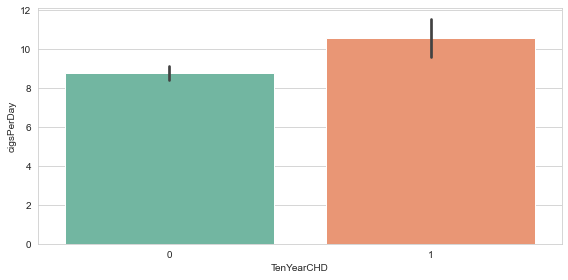

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x='TenYearCHD',y='cigsPerDay',data=df, palette = 'Set2')
plt.tight_layout()

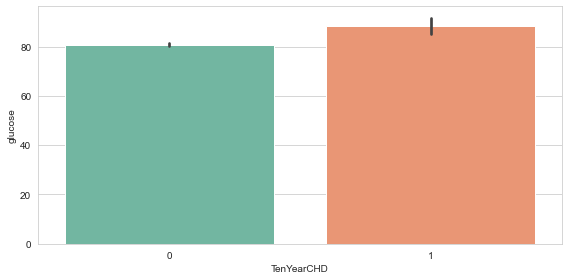

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(x='TenYearCHD',y='glucose',data=df, palette = 'Set2')
plt.tight_layout()

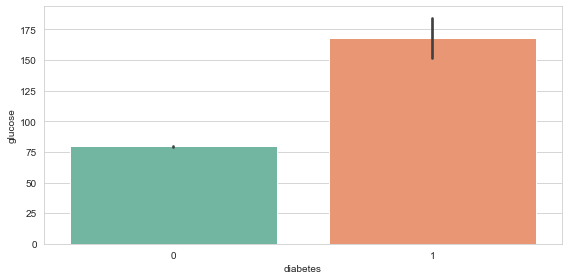

In [23]:
# 0 is not hvaing diabetes and 1 is having diabetes
plt.figure(figsize=(8,4))
sns.barplot(x='diabetes',y='glucose',data=df, palette = 'Set2')
plt.tight_layout()

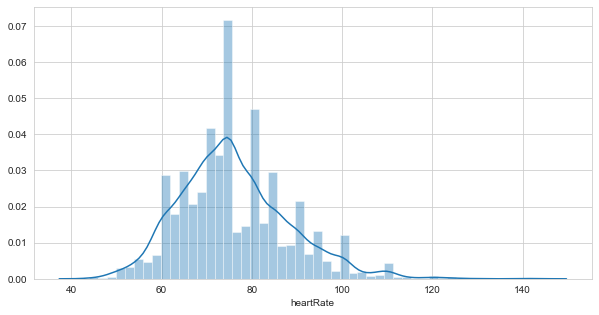

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['heartRate'])

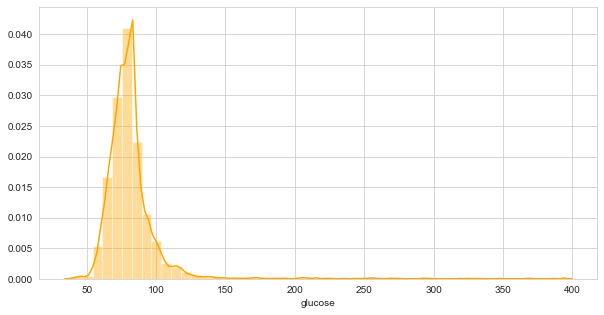

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'],color='orange')

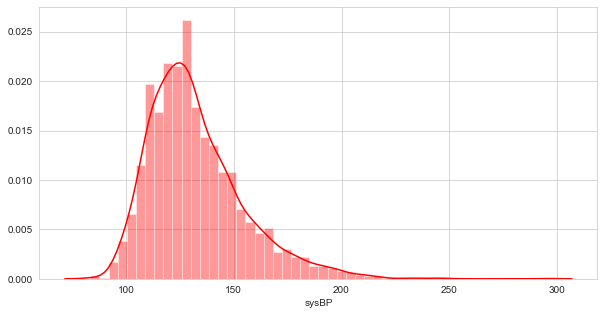

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df['sysBP'],color='red')

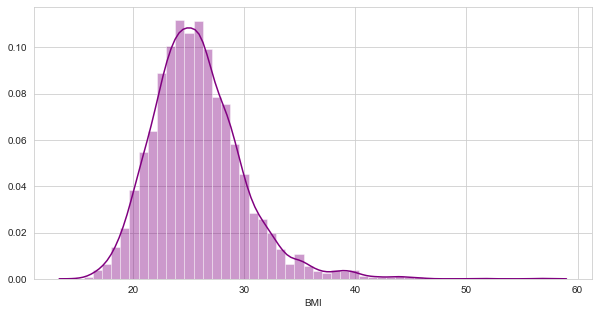

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['BMI'],color = 'purple')

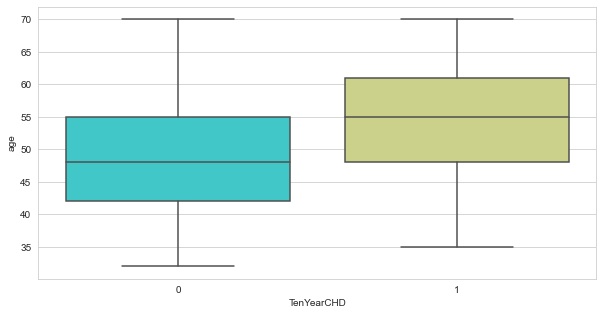

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TenYearCHD',y='age',data=df, palette= 'rainbow')

In [29]:
#We will drop the education column as it has a negative correlation with our target variable and will be of much  help.
df.drop('education',axis=1,inplace = True)

In [30]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [31]:
X = df.drop('TenYearCHD',axis = 1) #idependant variables
y = df['TenYearCHD'] # Dependant variable / target

# Balancing the dataset using SMOTETomek

In [32]:
#SMOTETomek is a hybrid method which uses undersampling method with an oversampling method.
from imblearn.combine import SMOTETomek

In [33]:
smk = SMOTETomek(random_state = 42)
X_res, y_res = smk.fit_sample(X,y)

In [34]:
X_res.shape, y_res.shape

((6816, 14), (6816,))

In [35]:
from collections import Counter

In [36]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3438, 1: 614})
Resampled dataset shape Counter({0: 3408, 1: 3408})


# Splitting the data into training and test sets

In [37]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=101)

# Scaling the data 

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
X_train.shape

(4771, 14)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [62]:
predictions = lr.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [64]:
print('Classification Report :')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy Score :')
print(accuracy_score(y_test,predictions))

Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1021
           1       0.69      0.69      0.69      1024

    accuracy                           0.69      2045
   macro avg       0.69      0.69      0.69      2045
weighted avg       0.69      0.69      0.69      2045



Confusion Matrix :
[[702 319]
 [321 703]]


Accuracy Score :
0.687041564792176


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators = 50)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [68]:
rfc_predict = rfc.predict(X_test)

In [69]:
print('Classification Report :')
print(classification_report(y_test,rfc_predict))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,rfc_predict))
print('\n')
print('Accuracy Score :')
print(accuracy_score(y_test,rfc_predict))

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1021
           1       0.89      0.86      0.87      1024

    accuracy                           0.88      2045
   macro avg       0.88      0.88      0.88      2045
weighted avg       0.88      0.88      0.88      2045



Confusion Matrix :
[[913 108]
 [144 880]]


Accuracy Score :
0.8767726161369194


# Support Vector Machines

In [70]:
from sklearn.svm import SVC

In [71]:
svm = SVC()
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)

print('Classification Report :')
print(classification_report(y_test,svm_predict))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,svm_predict))
print('\n')
print('Accuracy Score :')
print(accuracy_score(y_test,svm_predict))

Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1021
           1       0.73      0.75      0.74      1024

    accuracy                           0.74      2045
   macro avg       0.74      0.74      0.74      2045
weighted avg       0.74      0.74      0.74      2045



Confusion Matrix :
[[741 280]
 [255 769]]


Accuracy Score :
0.7383863080684596


In [72]:
#Using GridSearch CV and checking for the right hyperparameter to get better results
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [74]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.774, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.773, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.740, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.711, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.722, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.716, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.712, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.676, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.740, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.731, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.708, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.714, total=   0.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.714, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.709, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.692, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.720, total=   1.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.717, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.706, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.688, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.682, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.674, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.686, total=   0.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.3min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [75]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [76]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [77]:
svm = SVC(C=10,gamma=1)
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)

print('Classification Report :')
print(classification_report(y_test,svm_predict))
print('\n')
print('Confusion Matrix :')
print(confusion_matrix(y_test,svm_predict))
print('\n')
print('Accuracy Score :')
print(accuracy_score(y_test,svm_predict))

Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1021
           1       0.85      0.84      0.84      1024

    accuracy                           0.84      2045
   macro avg       0.84      0.84      0.84      2045
weighted avg       0.84      0.84      0.84      2045



Confusion Matrix :
[[867 154]
 [166 858]]


Accuracy Score :
0.843520782396088


# Comparing the Results

In [84]:
SVM = accuracy_score(y_test,svm_predict)
Random_Forest  = accuracy_score(y_test,rfc_predict)
Logistic_regression = accuracy_score(y_test,predictions)

In [85]:
models = [SVM,Random_Forest,Logistic_regression]
columns = ['Support_Vector_Machine', 'Random_Forest_Classifier', 'Logistic_Regression' ]


scores = pd.DataFrame(models,index=columns,columns=['Score'])
scores.sort_values(by='Score',ascending=False)

,Score
Random_Forest_Classifier,0.876773
Support_Vector_Machine,0.843521
Logistic_Regression,0.687042


From the above results, we can see that the Random Forest  Classification Model performs better than the other two. This model could be improved with more data.